# Student Perfomance Prediction Using Linear Regression

In [131]:
import pandas as pd 

df = pd.read_csv('student-mat.csv',sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [132]:
df['famrel']

0      4
1      5
2      4
3      3
4      4
      ..
390    5
391    2
392    5
393    4
394    3
Name: famrel, Length: 395, dtype: int64

Data exploration

In [133]:
#Check missing data
df.apply(lambda x: sum(x.isnull()),axis=0) 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Modelling

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Selecting features and target
X = df[['studytime','failures','famrel','absences','health','G1','G2']]
y = df['G3']

In [136]:
#Data splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [137]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [138]:
acc = model.score(X_test,y_test)
acc

0.7858132186620692

In [139]:
#Model prediction
y_pred = model.predict(X_test)

for idx in range(len(y_pred)):
    print(f"Prediction: {y_pred[idx]}, Test Data: {X_test.iloc[idx]}, True Label: {y_test.iloc[idx]}")

Prediction: 6.035513045287569, Test Data: studytime    1
failures     3
famrel       4
absences     2
health       3
G1           8
G2           8
Name: 78, dtype: int64, True Label: 10
Prediction: 12.194196912962962, Test Data: studytime     1
failures      0
famrel        4
absences      3
health        3
G1           14
G2           12
Name: 371, dtype: int64, True Label: 12
Prediction: 3.56776557868033, Test Data: studytime    2
failures     1
famrel       4
absences     8
health       5
G1           3
G2           5
Name: 248, dtype: int64, True Label: 5
Prediction: 8.794505198563792, Test Data: studytime    2
failures     0
famrel       5
absences     8
health       2
G1           8
G2           9
Name: 55, dtype: int64, True Label: 10
Prediction: 8.304923655982295, Test Data: studytime     2
failures      2
famrel        5
absences     11
health        4
G1            9
G2            9
Name: 390, dtype: int64, True Label: 9
Prediction: 12.40871678494462, Test Data: studytime    

In [140]:
df.iloc[78]

school            GP
sex                M
age               17
address            U
famsize          GT3
Pstatus            T
Medu               2
Fedu               1
Mjob           other
Fjob           other
reason          home
guardian      mother
traveltime         2
studytime          1
failures           3
schoolsup        yes
famsup           yes
paid              no
activities       yes
nursery          yes
higher            no
internet         yes
romantic          no
famrel             4
freetime           5
goout              1
Dalc               1
Walc               1
health             3
absences           2
G1                 8
G2                 8
G3                10
Name: 78, dtype: object

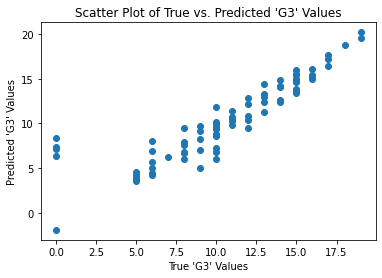

In [141]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. true 'G3' values
plt.scatter(y_test, y_pred)
plt.xlabel("True 'G3' Values")
plt.ylabel("Predicted 'G3' Values")
plt.title("Scatter Plot of True vs. Predicted 'G3' Values")
plt.show()

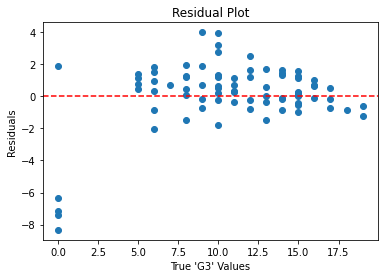

In [142]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("True 'G3' Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()